In [54]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

In [ ]:
class Autoencoder(object):

    def __init__(self, input_shape):

        # this is the size of our encoded representations
        # 32 floats -> compression of factor 24.5, 
        # assuming the input is 784 floats
        self.encoding_dim = 16  

        # this is our input placeholder
        self.input_img = Input(shape=(784,))

        # "encoded" is the encoded representation of the input
        self.encoded = Dense(self.encoding_dim, activation='relu')(self.input_img)

        # "decoded" is the lossy reconstruction of the input
        self.decoded = Dense(784, activation='sigmoid')(self.encoded)

        # this model maps an input to its reconstruction
        self.model = Model(self.input_img, self.decoded)

        self.model.compile(optimizer='adadelta',
                                 loss='binary_crossentropy')

        self.encoder_network()
        self.decoder_network()
        
    def encoder_network(self):

        # this model maps an input to its encoded representation
        self.encoder = Model(self.input_img, self.encoded)
    
    def decoder_network(self):

        # create a placeholder for an encoded (32-dimensional) input
		encoded_input = Input(shape=(self.encoding_dim,))
		# retrieve the last layer of the autoencoder model
		decoder_layer = self.model.layers[-1]
		# create the decoder model
		self.decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
class data(object):

    def __init__(self):
        self.get_data()
        self.network = Autoencoder(np.prod(self.x_train.shape[1:]))

    def get_data(self):
        (x_train, _), (x_test, _) = mnist.load_data()

        print (x_train.shape)
#         sys.exit()
        
        x_train = x_train.astype('float32') / 255.
        x_test = x_test.astype('float32') / 255.
        
        print (x_train.shape)
        sys.exit()
        
        self.x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
        self.x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    
    def train(self):
        self.network.model.fit(self.x_train, self.x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(self.x_test, x_test))
        

In [ ]:
data1 = data()
# data.get_data()

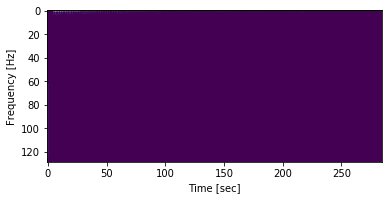

In [43]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('../Data/bass_acoustic/bass_acoustic_000-025-050.wav')
frequencies, times, spectogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectogram)
plt.imshow(spectogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [46]:
print (frequencies.shape)
print (times.shape)
print (spectogram.shape)
print (sample_rate)
print (samples.shape)

(129,)
(285,)
(129, 285)
16000
(64000,)


In [49]:
print (samples)
print (len(samples))

[0 0 0 ..., 0 0 0]
64000
